# Лабораторная работа 6

# Задача 1

## Генерация датасетов

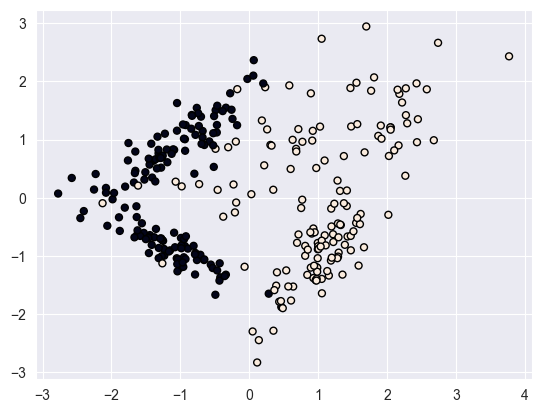

In [103]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=130)

plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

In [104]:
data_1

array([[-0.02868686,  2.04388363],
       [ 2.27041985,  1.42135291],
       [-1.00147177, -1.2014376 ],
       [ 0.57937236,  1.93263194],
       [-0.46001793,  0.1371689 ],
       [-1.39042182,  0.63758649],
       [ 0.53452578, -1.24704031],
       [ 1.54846703, -0.43033484],
       [ 1.42390235, -0.66417735],
       [-0.92403547,  1.2504802 ],
       [-1.27972514,  0.51914345],
       [ 1.32606785, -0.46697709],
       [-1.65312152,  0.46476816],
       [-0.72853996,  0.23631116],
       [ 1.66229418, -0.84931764],
       [ 0.99205326, -0.77456715],
       [ 0.46298519, -1.87565333],
       [-1.89094852, -0.33448194],
       [ 0.30523929,  0.90961122],
       [-1.06901816,  0.27817863],
       [ 1.31482652,  0.11959335],
       [-1.1892571 ,  0.6121558 ],
       [-0.48923115,  1.50693568],
       [ 0.21525344,  0.55897625],
       [ 1.29471143, -0.94173345],
       [-0.22987674,  0.22994024],
       [-2.07972195,  0.1705762 ],
       [-2.77327828,  0.07403439],
       [ 0.92814203,

In [105]:
data_y_1

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

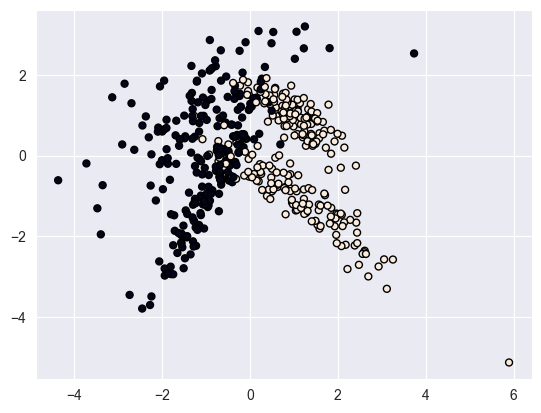

In [106]:
data_2, data_y_2 = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

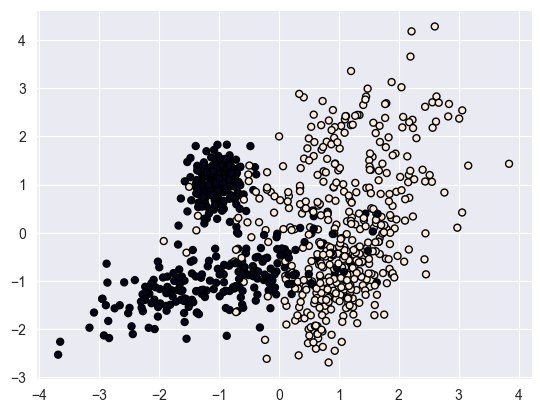

In [107]:
data_3, data_y_3 = make_classification(n_samples=900, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=200)

plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

In [108]:
data_3

array([[-0.58717342, -1.0223633 ],
       [ 0.32179001, -1.15806865],
       [-0.2722921 , -0.60066922],
       ...,
       [ 0.44937311,  0.50637135],
       [ 0.49874282, -0.85694015],
       [-2.06052394, -1.13159107]])

# Кластеризация

## K - means

In [109]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(2, n_init='auto').fit(data_1)
kmeans_2 = KMeans(2, n_init='auto').fit(data_2)
kmeans_3 = KMeans(2, n_init='auto').fit(data_3)

In [110]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

def cluster_and_metrics_kmeans(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=100, c='red')

Датасет: 1
rand score: 0.875139353400223
силуэт: 0.43759165636341607

индекс Калински-Харабаза: 239.1743762655582
индекс Дэвиса-Боулдина: 1.01159702590553


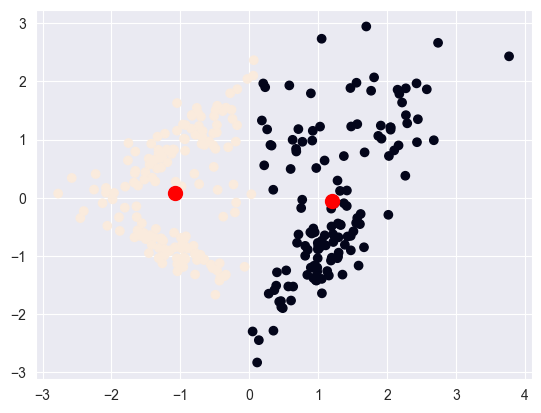

In [111]:
cluster_and_metrics_kmeans(data=data_1, data_y=data_y_1, claster=kmeans_1, num=1)

Датасет: 2
rand score: 0.8132585170340682
силуэт: 0.3437574727160817

индекс Калински-Харабаза: 260.7856454529204
индекс Дэвиса-Боулдина: 1.193623501922528


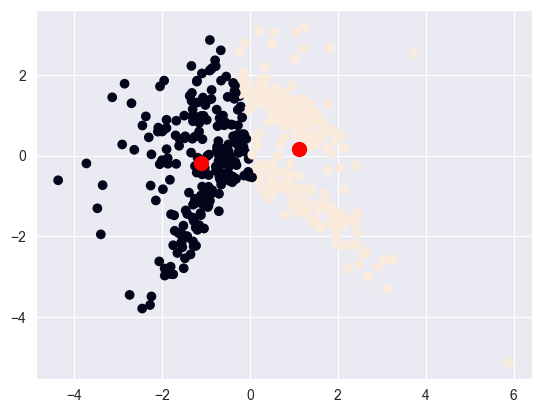

In [112]:
cluster_and_metrics_kmeans(data=data_2, data_y=data_y_2, claster=kmeans_2, num=2)

Датасет: 3
rand score: 0.8341960202694352
силуэт: 0.3957090369310663

индекс Калински-Харабаза: 574.9722831771891
индекс Дэвиса-Боулдина: 1.114034089618376


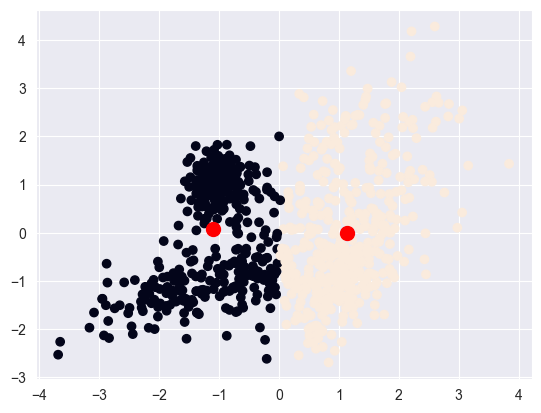

In [113]:
cluster_and_metrics_kmeans(data=data_3, data_y=data_y_3, claster=kmeans_3, num=3)

## Affinity propagation

In [114]:
from sklearn.cluster import AffinityPropagation

affinity_1 = AffinityPropagation(preference=-42).fit(data_1)
affinity_2 = AffinityPropagation(preference=-42).fit(data_2)
affinity_3 = AffinityPropagation(preference=-42).fit(data_3)

F:\Programming\GitHub_Reposit\Mashine-Learning\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
F:\Programming\GitHub_Reposit\Mashine-Learning\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [115]:
def cluster_and_metrics_affinity(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=50, c='black')
    

Датасет: 1
rand score: 0.627469342251951
силуэт: 0.4421873863893015

индекс Калински-Харабаза: 382.71065045545294
индекс Дэвиса-Боулдина: 0.773645678232183


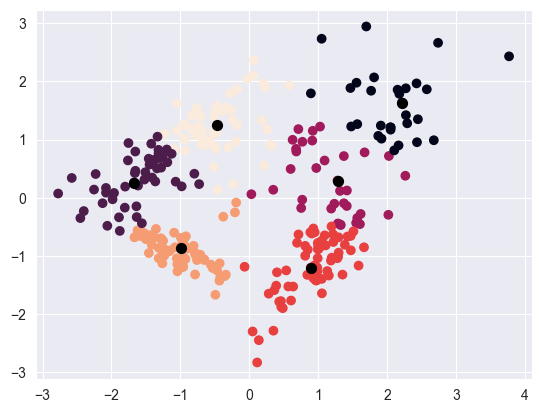

In [116]:
cluster_and_metrics_affinity(data=data_1, data_y=data_y_1, claster=affinity_1, num=1)

Датасет: 2
rand score: 0.5114549098196393
силуэт: 0.09265504562188306

индекс Калински-Харабаза: 36.5352534664856
индекс Дэвиса-Боулдина: 0.5230151487417911


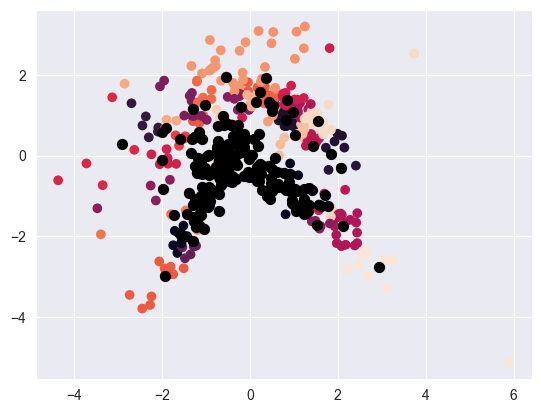

In [117]:
cluster_and_metrics_affinity(data=data_2, data_y=data_y_2, claster=affinity_2, num=2)

Датасет: 3
rand score: 0.5859226300828081
силуэт: 0.27856232889811183

индекс Калински-Харабаза: 78.29710033784045
индекс Дэвиса-Боулдина: 0.5335708627944745


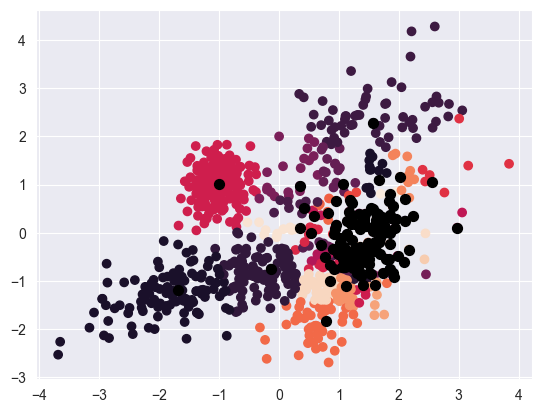

In [118]:
cluster_and_metrics_affinity(data=data_3, data_y=data_y_3, claster=affinity_3, num=3)

## DB-SCAN

In [119]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan_1 = DBSCAN().fit(data_1)
dbscan_2 = DBSCAN().fit(data_2)
dbscan_3 = DBSCAN().fit(data_3)

In [120]:
def cluster_and_metrics_dbscan(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    print(np.unique(claster.labels_))
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)

Датасет: 1
rand score: 0.4991304347826087
силуэт: 0.367765557373552

индекс Калински-Харабаза: 12.298862995252613
индекс Дэвиса-Боулдина: 1.4675015927198873
[-1  0]


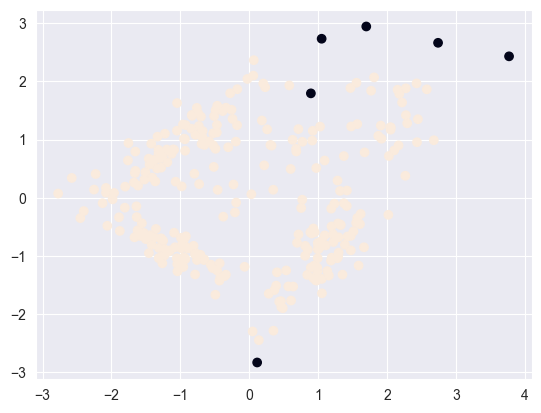

In [121]:
cluster_and_metrics_dbscan(data=data_1, data_y=data_y_1, claster=dbscan_1, num=1)

Датасет: 2
rand score: 0.5025330661322646
силуэт: 0.4050656049776778

индекс Калински-Харабаза: 4.439128278224971
индекс Дэвиса-Боулдина: 6.36475738203509
[-1  0]


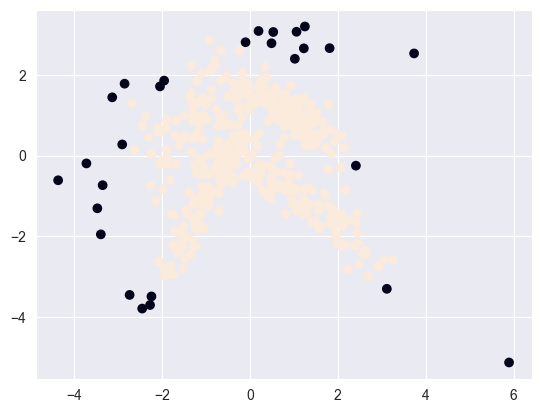

In [122]:
cluster_and_metrics_dbscan(data=data_2, data_y=data_y_2, claster=dbscan_2, num=2)

Датасет: 3
rand score: 0.49950562353231986
силуэт: 0.4364308430379813

индекс Калински-Харабаза: 4.582143802412806
индекс Дэвиса-Боулдина: 4.390903213416287
[-1  0]


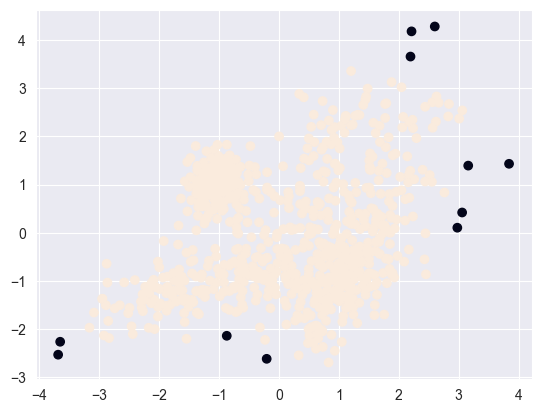

In [123]:
cluster_and_metrics_dbscan(data=data_3, data_y=data_y_3, claster=dbscan_3, num=3)

## Gaussian Mixtures, EM

In [124]:
from sklearn.mixture import GaussianMixture

gm_1 = GaussianMixture(n_components=3).fit(data_1)

gm_2 = GaussianMixture(n_components=3).fit(data_2)

gm_3 = GaussianMixture(n_components=3).fit(data_3)

In [125]:
def cluster_and_metrics_gm(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"rand score: {rand_score(claster.predict(data), data_y)}")
    print(f"силуэт: {silhouette_score(data, claster.predict(data))}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.predict(data))}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.predict(data))}")
    plt.scatter(data[:,0], data[:,1], c=claster.predict(data))
    plt.scatter(claster.means_[:,0], claster.means_[:,1], s=100, c='red')

Датасет: 1
rand score: 0.7898996655518394
силуэт: 0.39275358730611454

индекс Калински-Харабаза: 198.1020487760905
индекс Дэвиса-Боулдина: 0.7862297361274665


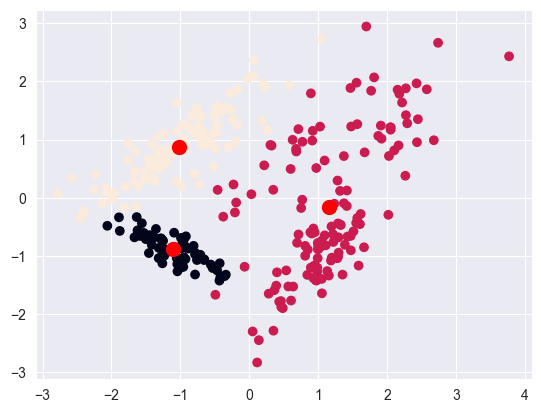

In [126]:
cluster_and_metrics_gm(data=data_1, data_y=data_y_1, claster=gm_1, num=1)

Датасет: 2
rand score: 0.7694909819639278
силуэт: 0.30115537289351

индекс Калински-Харабаза: 196.32379733601582
индекс Дэвиса-Боулдина: 1.0105310290060572


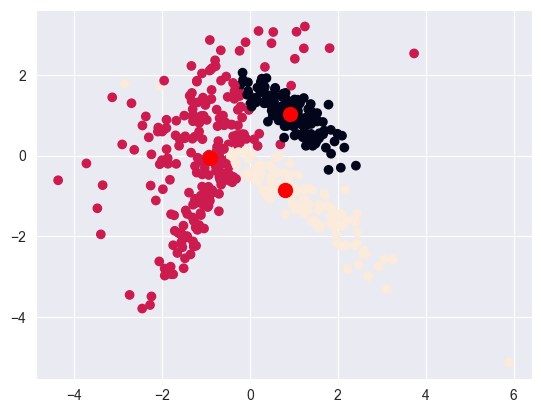

In [127]:
cluster_and_metrics_gm(data=data_2, data_y=data_y_2, claster=gm_2, num=2)

Датасет: 3
rand score: 0.7658830799653936
силуэт: 0.40523079668287676

индекс Калински-Харабаза: 541.2224448922217
индекс Дэвиса-Боулдина: 0.8174398752274016


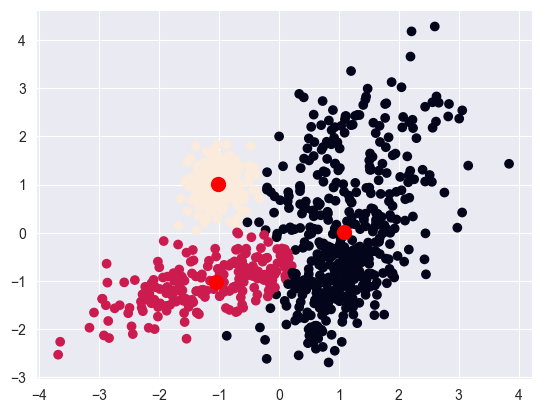

In [128]:
cluster_and_metrics_gm(data=data_3, data_y=data_y_3, claster=gm_3, num=3)

## Иерархическая кластеризация

In [129]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

clusters_1 = hierarchy.linkage(data_1, method="ward")
clusters_2 = hierarchy.linkage(data_2, method="ward")
clusters_3 = hierarchy.linkage(data_3, method="ward")

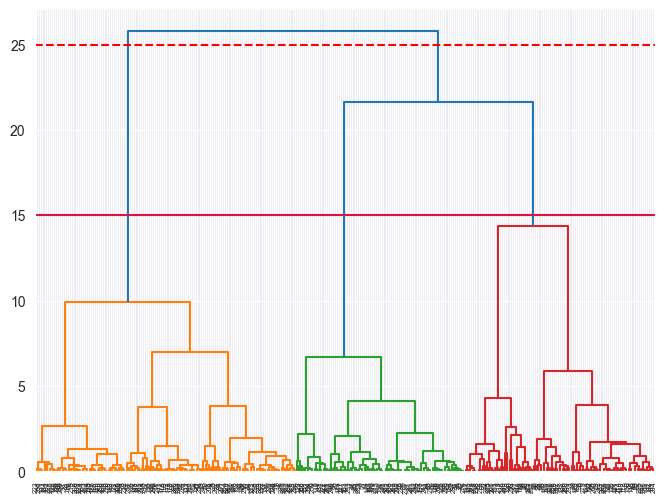

In [130]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_1)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

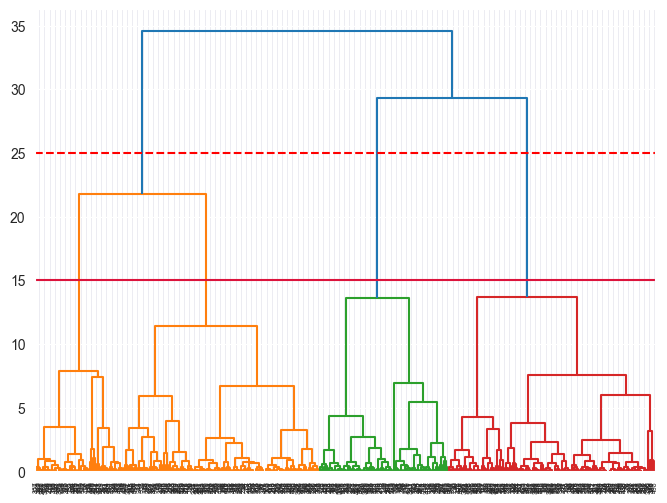

In [131]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_2)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

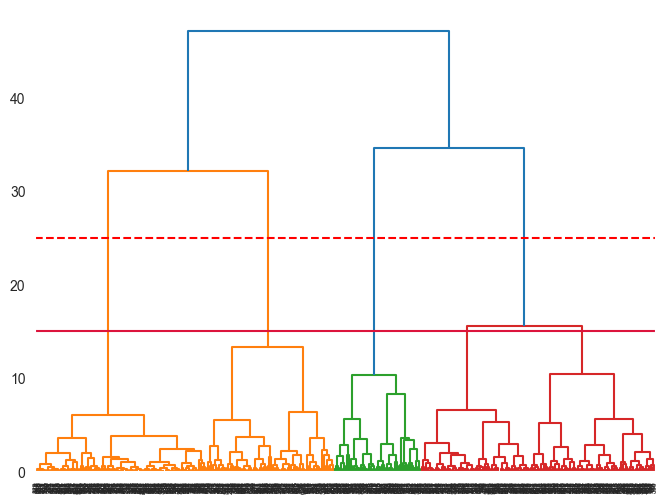

In [132]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_3)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

In [133]:
def cluster_and_metrics_cluster(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    clustering = AgglomerativeClustering(linkage="ward").fit(data)
    print(f"rand score: {rand_score(clustering.labels_, data_y)}")
    print(f"силуэт: {silhouette_score(data, clustering.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, clustering.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, clustering.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Датасет: 1
rand score: 0.7303010033444816
силуэт: 0.36426119672929647

индекс Калински-Харабаза: 184.3849927382834
индекс Дэвиса-Боулдина: 1.0883040381203561


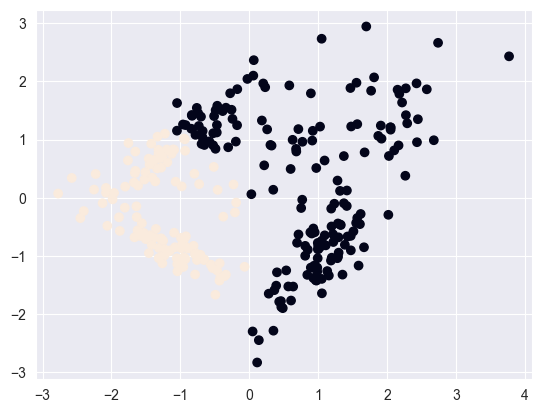

In [134]:
cluster_and_metrics_cluster(data=data_1, data_y=data_y_1, claster=clusters_1, num=1)

Датасет: 2
rand score: 0.7853386773547094
силуэт: 0.3257816852605416

индекс Калински-Харабаза: 239.7891961206974
индекс Дэвиса-Боулдина: 1.2281263155316728


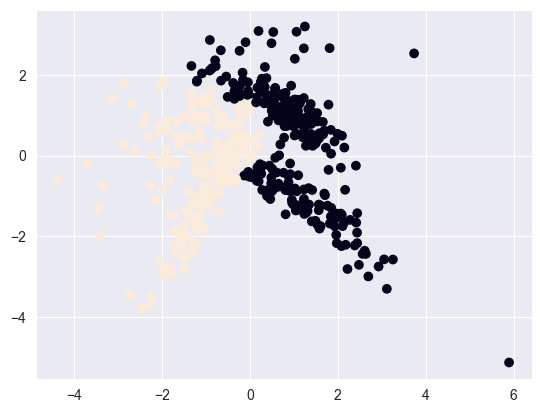

In [135]:
cluster_and_metrics_cluster(data=data_2, data_y=data_y_2, claster=clusters_2, num=2)

Датасет: 3
rand score: 0.8197997775305895
силуэт: 0.3886076411585022

индекс Калински-Харабаза: 562.0620504789613
индекс Дэвиса-Боулдина: 1.1251889910763966


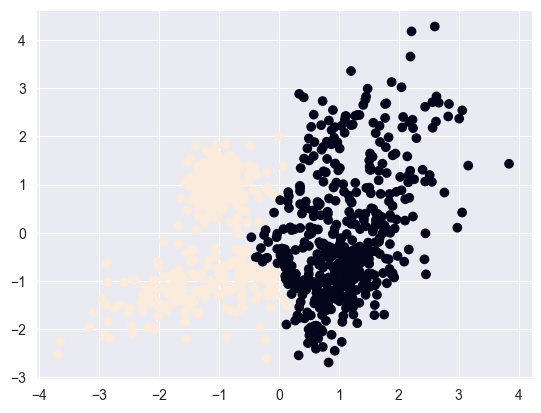

In [136]:
cluster_and_metrics_cluster(data=data_3, data_y=data_y_3, claster=clusters_3, num=3)

## Карты Кохонена

In [137]:
from sklearn_som.som import SOM

In [138]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_1)
predictions_1 = iris_som.predict(data_1)
predictions_1

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], d

In [139]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score

print(rand_score(predictions_1, data_y_1))
print(jaccard_score(predictions_1, data_y_1, average="micro"))
print(silhouette_score(data_1, predictions_1))
print(davies_bouldin_score(data_1, predictions_1))

0.5111705685618729
0.26582278481012656
0.32838318909522923
1.2917199059804736


In [140]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_2)
predictions_2 = iris_som.predict(data_2)
predictions_2

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [141]:
print(rand_score(predictions_2, data_y_2))
print(jaccard_score(predictions_2, data_y_2, average="micro"))
print(silhouette_score(data_2, predictions_2))
print(davies_bouldin_score(data_2, predictions_2))

0.7501322645290581
0.07874865156418555
0.31370997583185
1.2218802118057588


In [142]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_3)
predictions_3 = iris_som.predict(data_3)
predictions_3

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [143]:
print(rand_score(predictions_3, data_y_3))
print(jaccard_score(predictions_3, data_y_3, average="micro"))
print(silhouette_score(data_3, predictions_3))
print(davies_bouldin_score(data_3, predictions_3))

0.809210233592881
0.056338028169014086
0.39166228614172716
1.123091062976928


# Задача 2

In [144]:
import pandas as pd

data_class = pd.read_csv(r"F:\Programming\GitHub_Reposit\Mashine-Learning\Работа 6\Data\card_transdata.csv")[:2000]

In [145]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [146]:
dtc = data_class
data_class = dtc.to_numpy()

# Kmeans 

In [147]:
kmeans_class = KMeans().fit(data_class)

силуэт: 0.5483566663821126

индекс Калински-Харабаза: 3623.670432702194
индекс Дэвиса-Боулдина: 0.5479937549344189


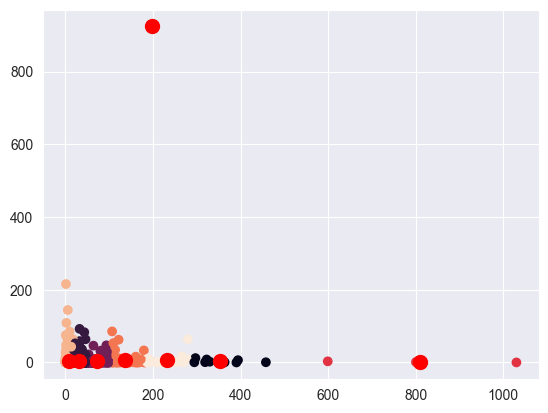

In [148]:
print(f"силуэт: {silhouette_score(data_class, kmeans_class.labels_)}\n")
print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data_class, kmeans_class.labels_)}")
print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data_class, kmeans_class.labels_)}")
plt.scatter(data_class[:,0], data_class[:,1], c=kmeans_class.labels_)
plt.scatter(kmeans_class.cluster_centers_[:,0], kmeans_class.cluster_centers_[:,1], s=100, c='red')

# Иерархическая кластеризация

In [149]:
cluster_class = hierarchy.linkage(data_class, method="ward")

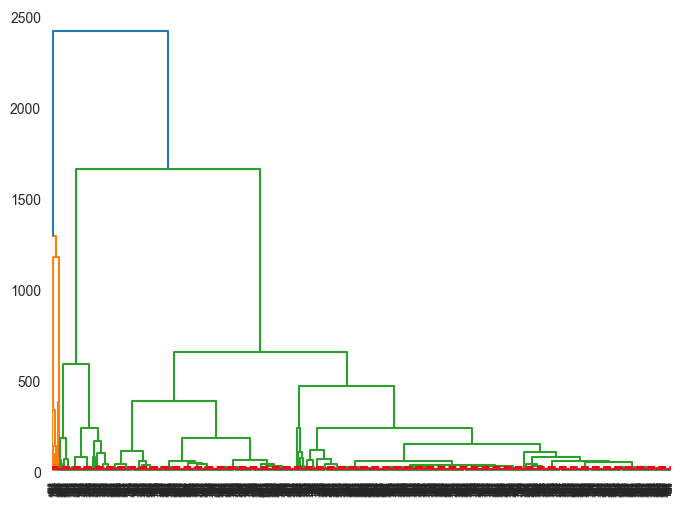

In [150]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(cluster_class)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

силуэт: 0.8999556139379867

индекс Калински-Харабаза: 1495.687571004934
индекс Дэвиса-Боулдина: 0.5331441405770643


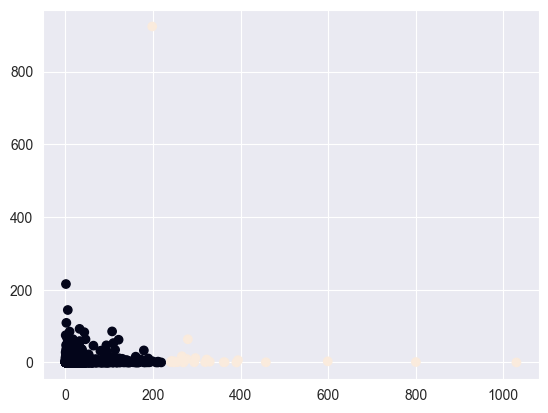

In [151]:
clustering = AgglomerativeClustering(linkage="ward").fit(data_class)
print(f"силуэт: {silhouette_score(data_class, clustering.labels_)}\n")
print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data_class, clustering.labels_)}")
print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data_class, clustering.labels_)}")
plt.scatter(data_class[:,0], data_class[:,1], c=clustering.labels_)

# DBScan

In [152]:
dbscan_class = DBSCAN().fit(data_class)

силуэт: -0.5930484022788105

индекс Калински-Харабаза: 1.72181222924603
индекс Дэвиса-Боулдина: 1.4389799505531462
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


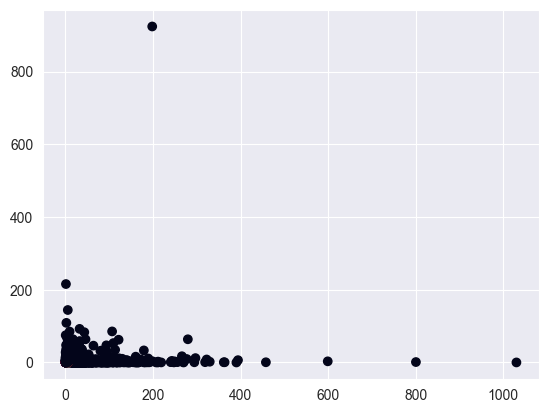

In [153]:
print(f"силуэт: {silhouette_score(data_class, dbscan_class.labels_)}\n")
print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data_class, dbscan_class.labels_)}")
print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data_class, dbscan_class.labels_)}")
print(np.unique(dbscan_class.labels_))
plt.scatter(data_class[:,0], data_class[:,1], c=dbscan_class.labels_)

Итого: Худший результат показал DBScan, лучший результат показала иерархическая кластеризация: силуэт около 0.9